<h1 style = "font-family: Comic Sans MS">PROGRAMING FOR DATA SCIENCE - FINAL PROJECT </h1>

<h1 style = "font-family: Comic Sans MS">Open car store </h1>

<h1 style = "font-family: Comic Sans MS"> Introduction </h1>

**Tên: Nguyễn Đức Trường - 20127374**

Trong những năm trở lại đây, việc mua bán xe cũ đang dần trở nên phổ biến và nhu cầu này càng ngày càng tăng khi mà nhiều người muốn nâng cấp chiếc xe của mình lên dòng mới hơn và khi đó chiếc xe cũ của họ không còn nhiều công dụng, còn đối với người đi mua thì khi mua xe cũ thì họ cũng sẽ tiết kiệm được một khoản tiền. Nhận thấy thị trường xe cũ khá tiềm năng nên em quyết định mở một cửa hàng mua bán xe cũ.

Nhưng vì mới thành lập, chưa có nhiều kinh nghiệm mở cửa hàng nên cửa hàng gặp một số khó khăn:

Công ty sẽ đặt ở thành phố nào?

Do số vốn còn tương đối ít, vì vậy không phải xe nào đến bán chúng ta cũng có thể nhập, cần phải chọn những xe mà có tỉ lệ cao là sẽ bán được để nhập để có thể thu hồi vốn nhanh. Vậy làm sao để nhận biết được chiếc xe như thế nào thì dễ bán ra? 
Nên nhập 
- Các dòng xe mạnh hay yếu
- Tình trạng như thế nào
- Sử dụng loại nhiên liệu nào
- Xe thuộc hãng nào
- Tầm giá nào

Chưa có kinh nghiệm đánh giá xe

Vì vậy em sẽ sử dụng một tập dữ liệu về thông tin của những chiếc xe cũ đã được bán trong năm 2019 để có thể tìm ra những thông tin hữu ích cho cửa hàng mới thành lập của mình

**Nguồn dữ liệu**

Used Cars Price prediction
   >https://www.kaggle.com/datasets/colearninglounge/used-cars-price-prediction

<h1 style = "font-family: Comic Sans MS"> Library </h1> 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers 

<h1 style = "font-family: Comic Sans MS"> Read data </h1> 

In [2]:
df = pd.read_csv('./data/train.csv', sep = ',')
data_dict = pd.read_excel('./data/data dictionary.xlsx')

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<h1 style = "font-family: Comic Sans MS"> Exploring and Pre-processing </h1> 

## Overview

In [4]:
df.shape

(6019, 13)

Dữ liệu có 6019 row và 13 column

### Data dictionary

Mô tả các thuộc tính của dữ liệu (tương ứng với mỗi column)

In [5]:
with pd.option_context('display.max_colwidth', None): 
    display(data_dict)

,Attribute,Description
0,Name,The brand and model of the car
1,Location,The location in which the car is being sold or is available for purchase
2,Year,The year or edition of the model
3,Kilometers_Driven,The total kilometers driven in the car by the previous owner(s) in KM
4,Fuel_Type,The type of fuel used by the car
5,Transmission,The type of transmission used by the car
6,Owner_Type,"Whether the ownership is Firsthand, Second hand or other"
7,Mileage,The standard mileage offered by the car company in kmpl or km/kg
8,Engine,The displacement volume of the engine in cc
9,Power,The maximum power of the engine in bhp


In [6]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5994,Honda City 1.5 E MT,Pune,2009,60000,Petrol,Manual,Third,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,3.25


Mỗi dòng chứa thông tin về các thuộc tính của một chiếc xe

### Kiểm tra dữ liệu có bị lặp hay không:

In [7]:
dup = df.index.duplicated(keep='first').sum()

In [8]:
print('Dữ liệu có', dup, 'dòng bị lặp')

Dữ liệu có 0 dòng bị lặp


### Kiểu dữ liệu 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


`New_Price` có quá nhiều giá trị NULL

In [10]:
df.drop(columns="New_Price",inplace=True)

Các column `Mileage`, `Engine`, `Power` cần có dạng numeric tuy nhiên hiện tại type đang là object

In [11]:
df[['Mileage', 'Engine', 'Power']].sample(n = 7)

,Mileage,Engine,Power
3414,20.36 kmpl,1197 CC,78.9 bhp
5716,17.3 kmpl,993 CC,60 bhp
5695,17.4 kmpl,1497 CC,117.3 bhp
5814,18.9 kmpl,1197 CC,82 bhp
4806,19.7 kmpl,796 CC,35 bhp
2384,24.3 kmpl,1248 CC,88.5 bhp
678,22.32 kmpl,1582 CC,126.32 bhp


In [12]:
def get_num(text):
    if type(text) == float:
        return text
    else:
        if text == 'null bhp':
            return np.nan
        else:
            return float(text.split()[0])

In [13]:
df['Mileage'] = df['Mileage'].apply(lambda x: get_num(x) )
df['Engine'] = df['Engine'].apply(lambda x: get_num(x) )
df['Power'] = df['Power'].apply(lambda x: get_num(x) )

## Từng thuộc tính

### * Numeric

In [14]:
num_col_info_df = df.select_dtypes(exclude='object')
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

In [15]:
num_col_info_df = num_col_info_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

In [16]:
num_col_info_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
missing_ratio,0.0,0.0,0.00,0.6,2.4,0.7,0.00
min,1998.0,171.0,0.00,72.0,34.2,0.0,0.44
lower_quartile,2011.0,34000.0,15.20,1198.0,75.0,5.0,3.50
median,2014.0,53000.0,18.20,1493.0,97.7,5.0,5.60
upper_quartile,2016.0,73000.0,21.10,1984.0,138.1,5.0,10.00
max,2019.0,6500000.0,33.54,5998.0,560.0,10.0,160.00


Loại bỏ các row chứa missing value

In [17]:
df = df.dropna(axis=0)

In [18]:
df.shape

(5872, 12)

Thay thế column `Year` thành `age` có giá trị là số tuổi của xe

In [19]:
df['Age'] = df['Year'].apply(lambda x: 2019 - x)
df.drop(columns = ['Year'], inplace = True)
df['Age'].unique()

array([ 9,  4,  8,  7,  6,  3,  1,  5,  2, 12, 10, 11,  0, 13, 15, 17, 19,
       14, 16, 20, 21, 18], dtype=int64)

#### Phân bố

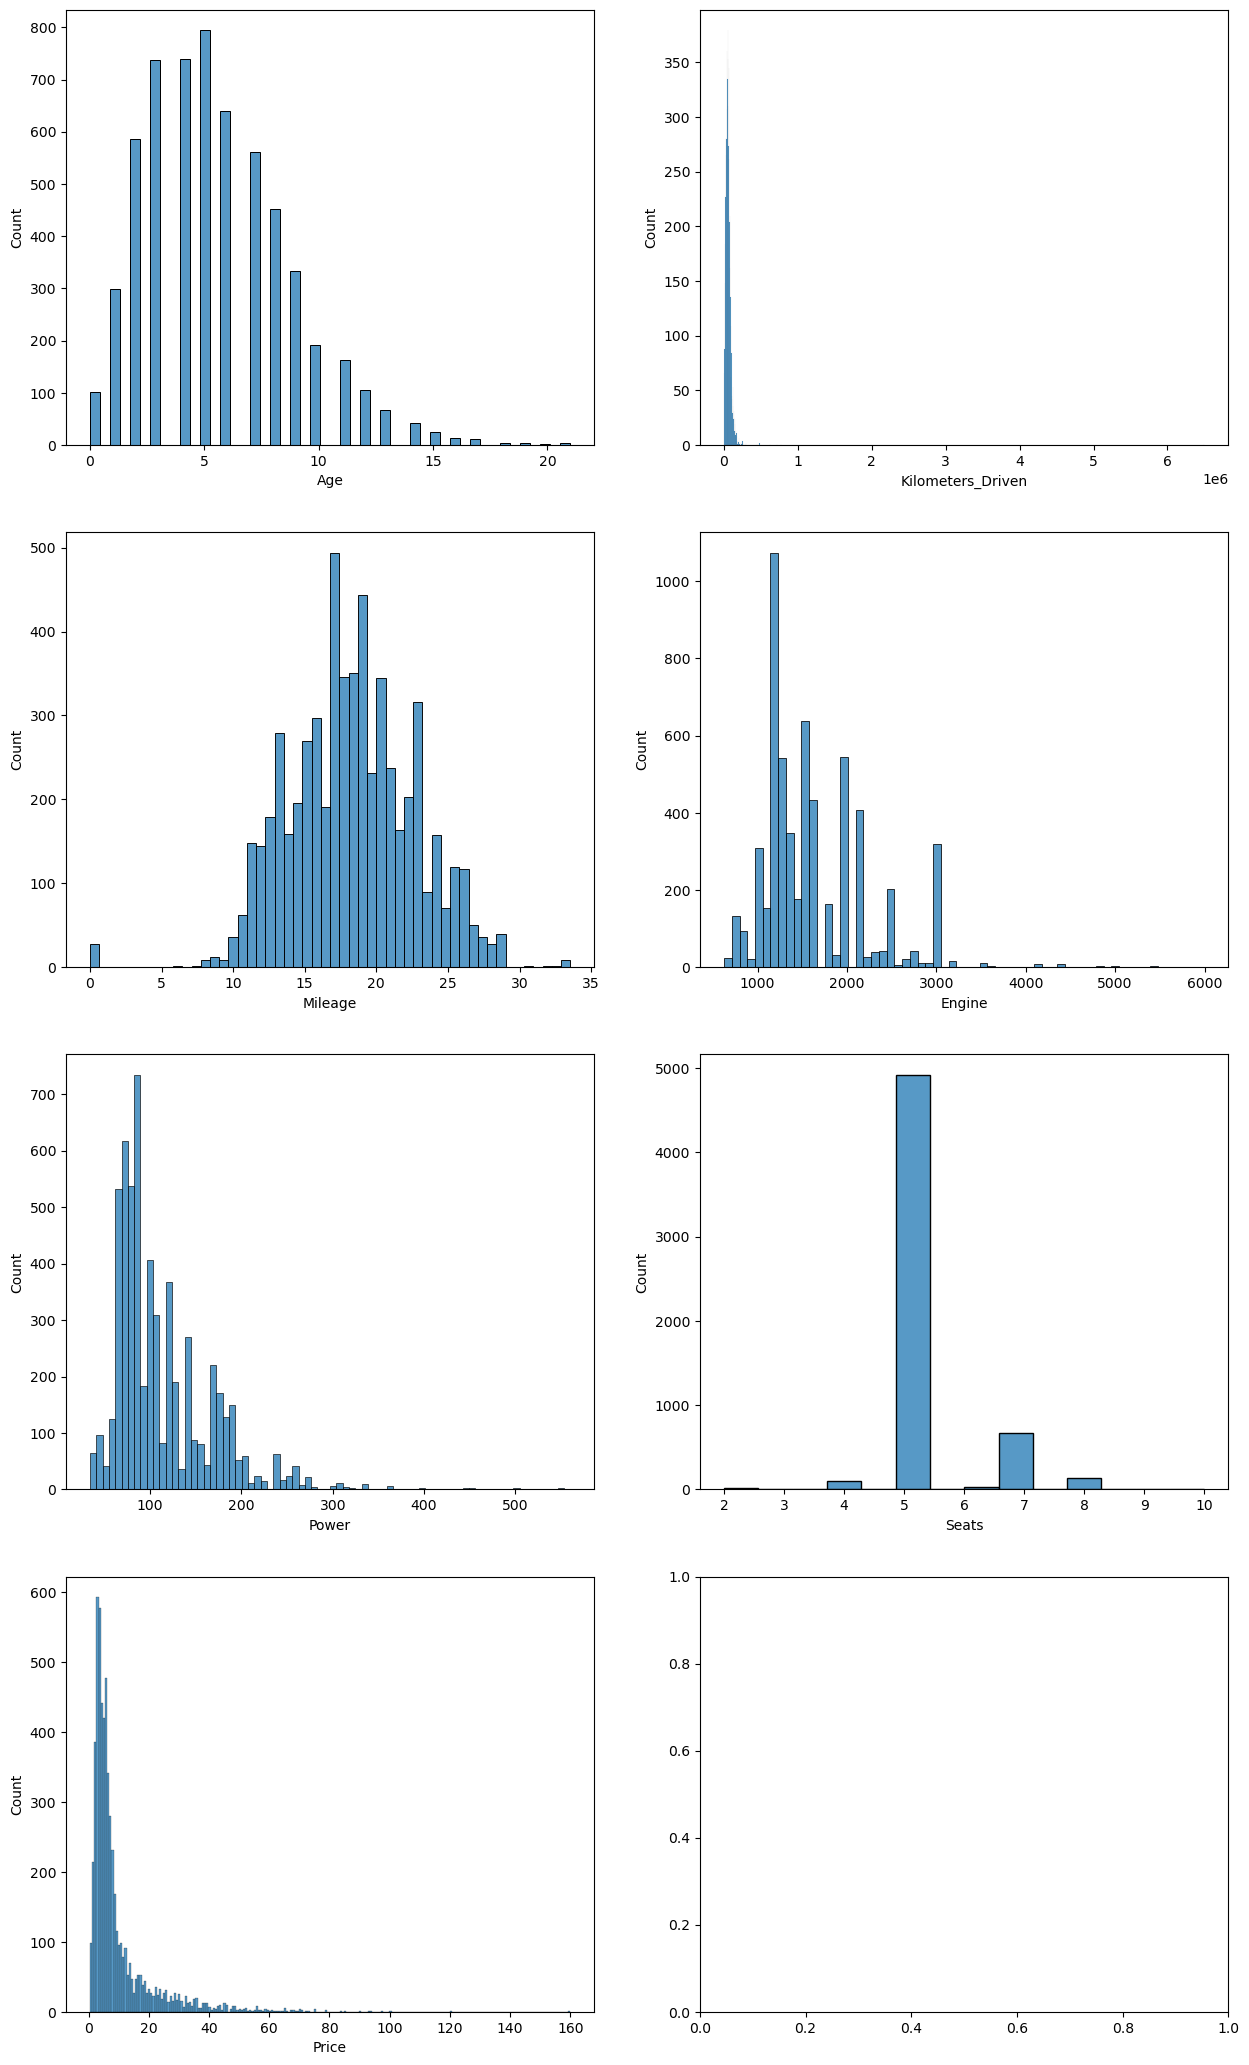

In [20]:
fig, ax = plt.subplots(figsize = (15 , 26), ncols=2, nrows= 4)
sns.histplot(data = df , x = 'Age', ax=ax[0][0]);
sns.histplot(data = df , x = 'Kilometers_Driven',ax=ax[0][1]);
sns.histplot(data = df , x = 'Mileage', ax=ax[1][0]);
sns.histplot(data = df , x = 'Engine',ax=ax[1][1]);
sns.histplot(data = df , x = 'Power', ax=ax[2][0]);
sns.histplot(data = df , x = 'Seats',ax=ax[2][1]);
sns.histplot(data = df , x = 'Price',ax=ax[3][0]);

Với `Kilometers_Driven` và `Price` loại bỏ các giá trị outlier để quan sát rõ hơn

In [21]:
df_non_outlier = df.select_dtypes(exclude='object')
outliears = detect_outliers(df_non_outlier,0,df_non_outlier.columns)
df_non_outlier.drop(outliears,inplace=True)

C:\ProgramData\Anaconda3\envs\min_ds-env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


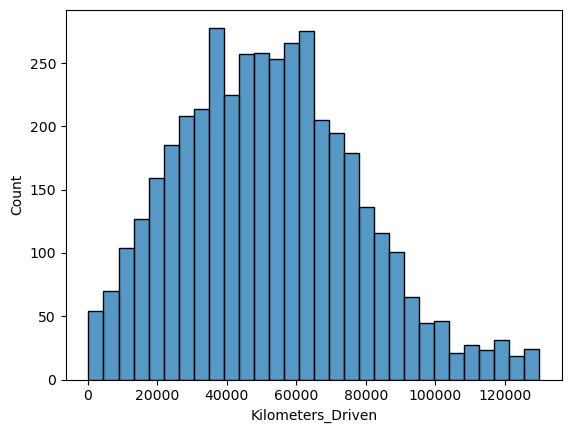

In [22]:
sns.histplot(data = df_non_outlier , x = 'Kilometers_Driven');

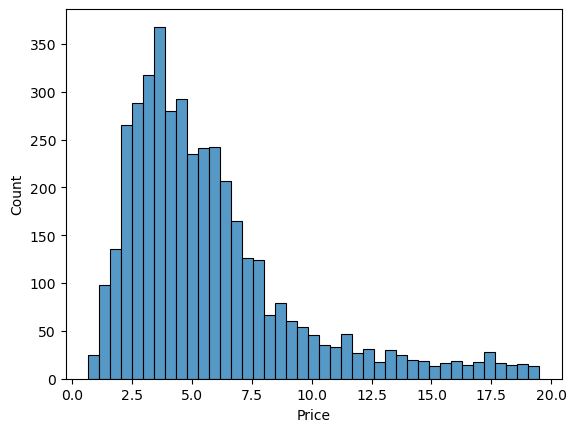

In [23]:
sns.histplot(data = df_non_outlier , x = 'Price');

#### Nhận xét

Các thuộc tính đều có sự phân bố không đều, thường sẽ tập trung vào một khoảng. Ta sẽ dựa vào đây để tìm ra đặc điểm của những chiếc xe được bán chạy.

### * Category

Ta sẽ bổ sung thêm column `Brand` chứa giá trị là hãng sản xuất xe:

In [24]:
df['Brand'] = df['Name'].apply(lambda x: x.split(' ')[0])

In [25]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [26]:
cat_col_info_df = df.select_dtypes(include='object')

In [27]:
def get_info(df):
    dic = {}
    for column in df:
        dic[column] = {'missing_ratio' :  (df[column].isna().mean() * 100).round(1),
                      'num_dif_val' : len(df[column].unique()),
                       'mode': df[column].mode()[0],
                      'list_val' : df[column].unique(),
                      }
    return pd.DataFrame(dic)

In [28]:
get_info(cat_col_info_df)

,Name,Location,Fuel_Type,Transmission,Owner_Type,Brand
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_dif_val,1811,11,4,2,4,30
mode,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,Maruti
list_val,"[Maruti Wagon R LXI CNG, Hyundai Creta 1.6 CRD...","[Mumbai, Pune, Chennai, Coimbatore, Hyderabad,...","[CNG, Diesel, Petrol, LPG]","[Manual, Automatic]","[First, Second, Fourth & Above, Third]","[Maruti, Hyundai, Honda, Audi, Nissan, Toyota,..."


**Tổng quan về các thuộc tính:**

**- Location**

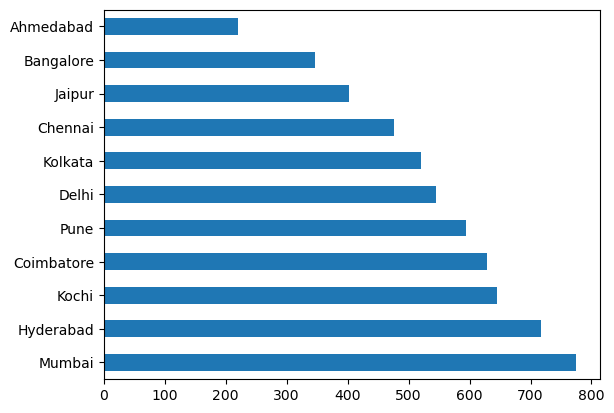

In [29]:
df['Location'].value_counts().plot.barh();

**- Fuel_Type**

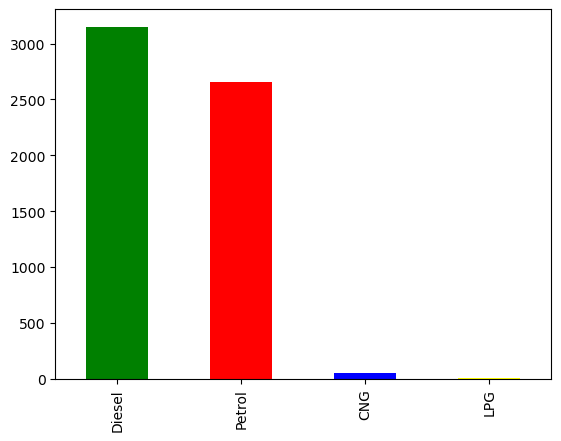

In [30]:
df['Fuel_Type'].value_counts().plot.bar(color = ['green', 'red', 'blue', 'yellow']);

**- Transmission**

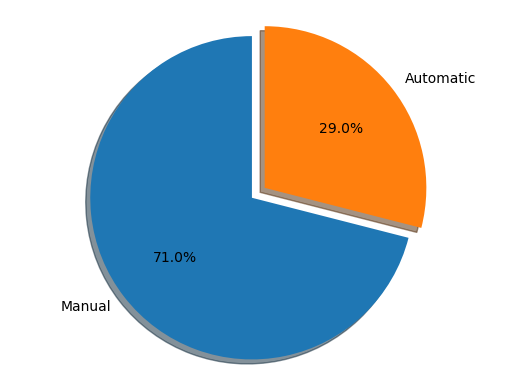

In [31]:
Trans = df['Transmission'].value_counts()
labels = ['Manual', 'Automatic']

explode = ( 0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(Trans, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

**- Owner_Type**

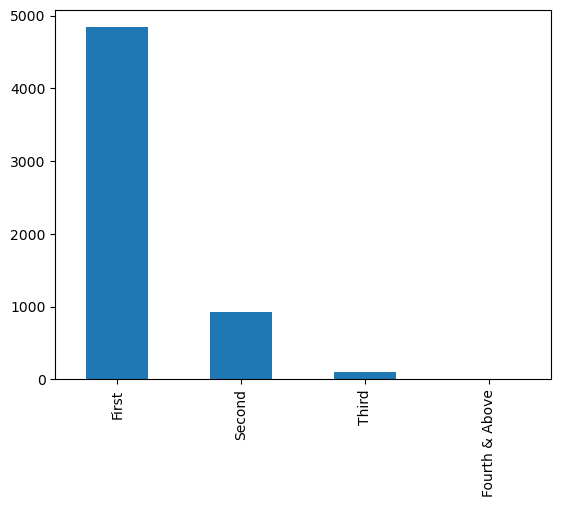

In [32]:
df['Owner_Type'].value_counts().plot.bar();

**- Brand**

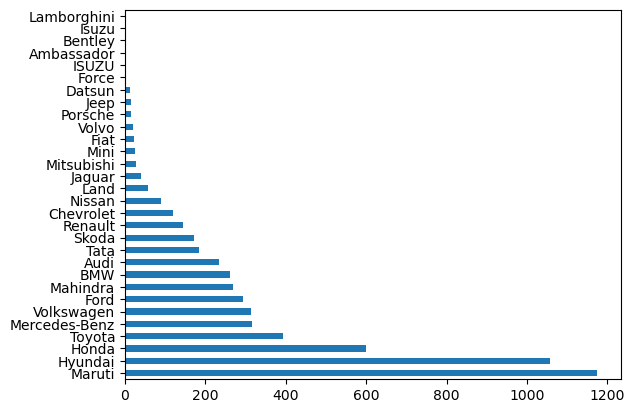

In [33]:
brand = df['Brand'].value_counts()
brand.plot.barh();

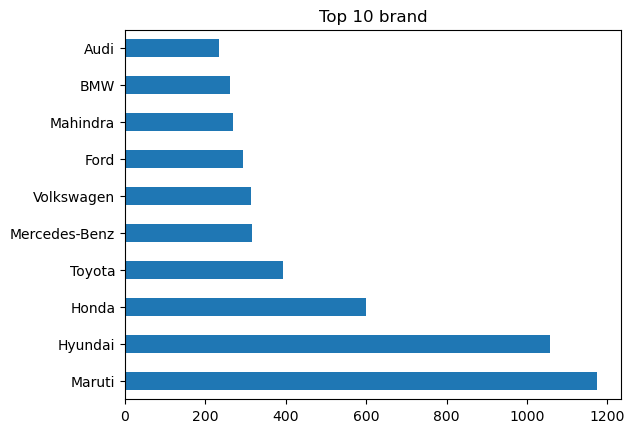

In [34]:
brand = df['Brand'].value_counts().head(10)
brand.plot.barh(title = "Top 10 brand");

#### Nhận xét

Với `Location`, giá trị nằm trong khoảng 200 - 800, tuy nhiên chênh lệch không quá nhiều, thành phố bán ra số xe nhiều nhất là **Mumbai** và ít nhất là **Ahmedabad**.

`Fuel_Type`: **Diesel** và **Petrol** chiếm phần lớn và có số lượng xấp xỉ nhau

`Transmission`: Hộp số **Manual** chiếm phần lớn ( > 70%), hộp số **Automatic** chỉ chiếm < 30%

`Owner_Type`: **First** có số lượng vượt trội

`Brand`: **Hyundai**, **Honda**, **Maruti** là 3 Brand có số lượng xe bán ra vượt trội so với phần còn lại

<h1 style = "font-family: Comic Sans MS"> Answer question </h1> 

### 1. Công ty sẽ đặt ở thành phố nào?

Mỗi thành phố sẽ có mức sống khác nhau dẫn đến nhu cầu mua xe, phân khúc xe họ mua cũng sẽ khác nhau. Chúng cần biết thành phố nào sẽ có nhu cầu mua xe cao nhất và xu hướng mua xe ở các thành phố đó


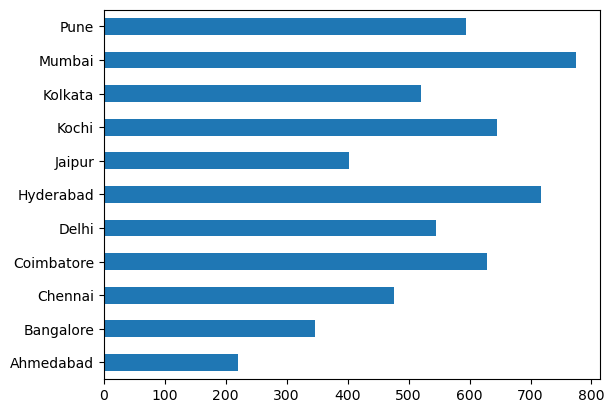

In [35]:
city_profile = pd.DataFrame()
city_profile['Count'] = df['Location'].value_counts()
city_profile['Count'].sort_index().plot.barh();

**Mumbai** là thành phố có số lượng xe bán ra nhiều nhất tuy nhiên chưa thực sự vượt trội. Có 7 thành phố có lượng xe nhiều hơn 500

Ta sẽ đánh giá thêm doanh thu ở từng thành phố

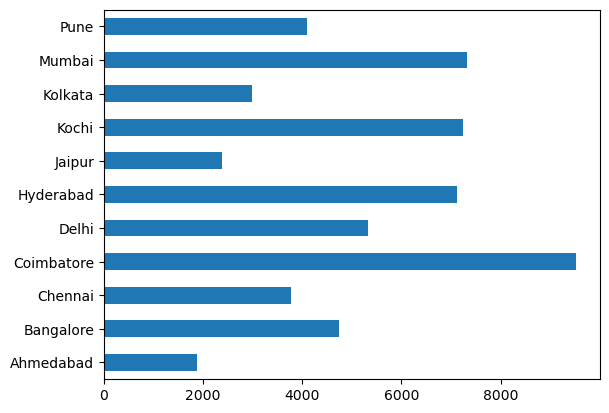

In [37]:
df_cp = df.copy()
city_profile['Total_Revenue'] = df_cp.groupby('Location')['Price'].sum()
city_profile['Total_Revenue'].sort_index().plot.barh();

Có thể thấy có một số thành phố dù số lượng xe bán ra cao tuy nhiên doanh thu thấp hơn các thành phố khác. Điều này có thể do mỗi thành phố sẽ có nhu cầu mua xe ở phân khúc khác nhau.

Ta sẽ xem tiếp mức giá trung bình trên mỗi xe bán ra ở các thành phố.

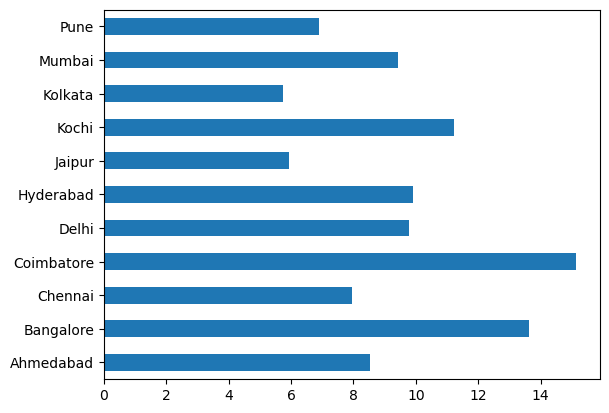

In [38]:
city_profile['Mean_Price'] = df_cp.groupby('Location')['Price'].sum() / df_cp.groupby('Location')['Price'].count()
city_profile['Mean_Price'].sort_index().plot.barh();

Do cửa hàng vừa mở nên vốn chưa có nhiều, việc mua và bán các dòng xe đắt tiền có thể sẽ mạo hiểm hơn. 

Vì vậy chúng ta nên chọn các thành phố có nhu cầu mua xe với các dòng xe rẻ tiền hơn.

In [39]:
city_profile

,Count,Total_Revenue,Mean_Price
Mumbai,775,7313.37,9.436606
Hyderabad,718,7115.97,9.910822
Kochi,645,7247.70,11.236744
Coimbatore,629,9523.28,15.140350
Pune,594,4101.30,6.904545
Delhi,545,5329.55,9.778991
Kolkata,521,2990.48,5.739885
Chennai,476,3781.62,7.944580
Jaipur,402,2384.81,5.932363
Bangalore,347,4732.40,13.638040


##### Kết luận

Dựa trên tiêu chí là nhu cầu mua xe, thể hiện qua lượng xe đã bán trong năm 2019 và dựa trên phân khúc xe phổ biến ở thành phố đó thì có thể thấy **Pune** là thành phố phù hợp nhất cho cửa hàng khi vừa có doanh số bán ra cao (khoảng 600 xe) và mức giá trung bình cho mỗi xe là khoảng 7.

### 2 Nên nhập các xe như thế nào?

#### a. Giá xe

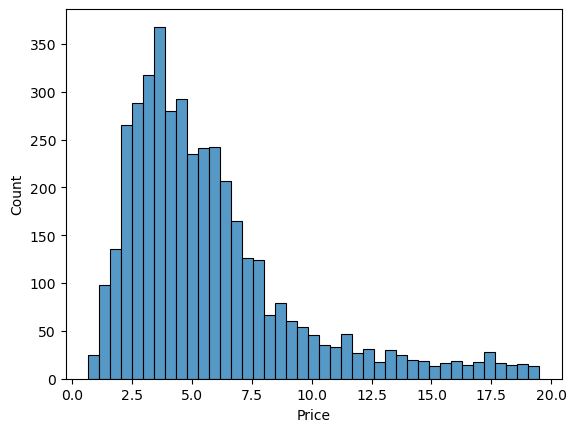

In [53]:
sns.histplot(data = df_non_outlier , x = 'Price');

Dễ dàng thấy thì phần lớn xe được bán sẽ tập trung trong tầm giá thấp ( < 7,5 )

#### b. Tình trạng xe

Tình trạng xe sẽ được thể hiện qua 3 thuộc tính là `Owner_type`, `Age` và  `Kilometers`.

Dễ dàng thấy những xe chỉ qua một đời chủ sẽ được ưu tiên.

- **`Kilometers_Driven`**

Loại bỏ các giá trị nhiễu để có thể quan sát dễ hơn

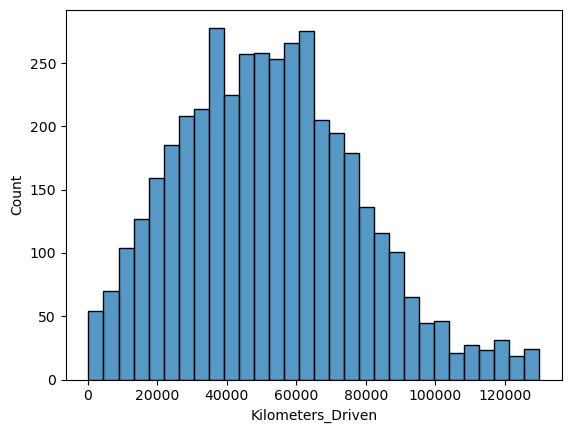

In [49]:
sns.histplot(data = df_non_outlier , x = 'Kilometers_Driven');

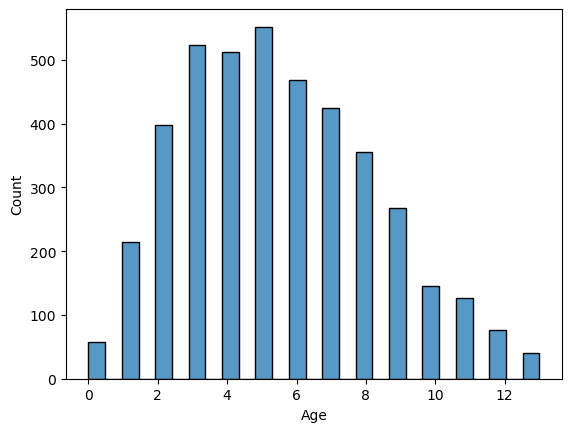

In [52]:
sns.histplot(data = df_non_outlier , x = 'Age');

In [42]:
df['Kilometers_Driven'].sum() / df['Age'].sum()

10560.25592870139

Một năm thì trung bình 1 xe đi khoảng 10.000km. Ta có thể thấy sự tương quan giữa 2 biểu đồ trên.

Không khó hiểu khi người mua sẽ ưu tiên mua những chiếc xe càng mới càng tốt. `Kilometers_Driven` và `Age` càng cao thì lượng mua giảm xuống tương đối đáng kể

Ở biểu đồ từ 1 đến 3, cũng như từ 0 đến 50.000km số lượng tăng dần có thể do lượng cung xe dưới 3 năm là tương đối ít hơn so với các dòng xe cũ hơn.

#### c. Động cơ:

Chúng ta sẽ xem người dùng sẽ thường mua xe sử dụng loại `Transmission` nào và có giá trị `Engine` và `Power` như thế nào?

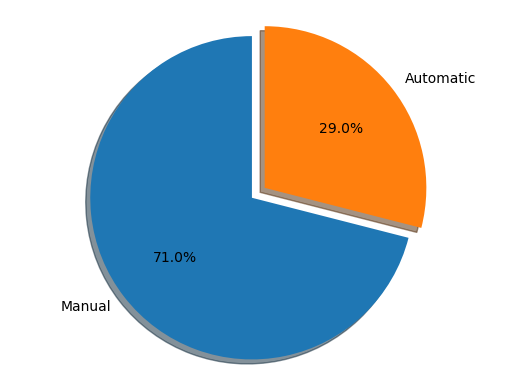

In [54]:
Trans = df['Transmission'].value_counts()
labels = ['Manual', 'Automatic']

explode = ( 0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(Trans, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Có thể thấy `Transmission` có kiểu `Manual` có lượt mua hoàn toàn vượt trội so với `Automatic`

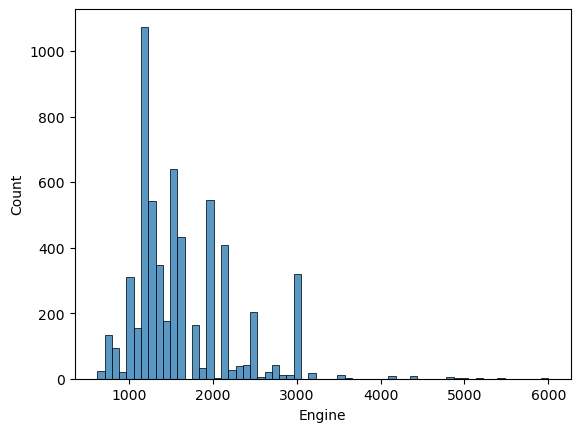

In [61]:
sns.histplot(data = df_cp , x = 'Engine');

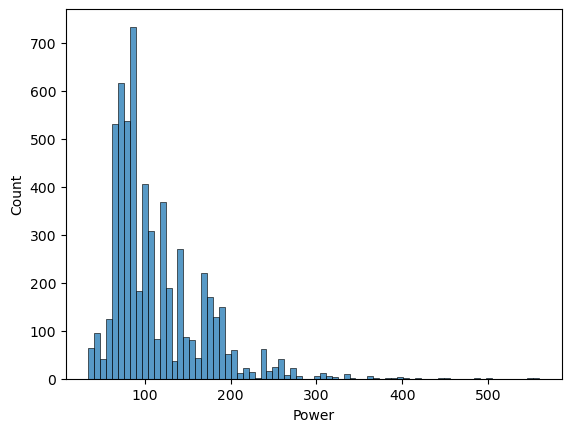

In [62]:
sns.histplot(data = df_cp , x = 'Power');

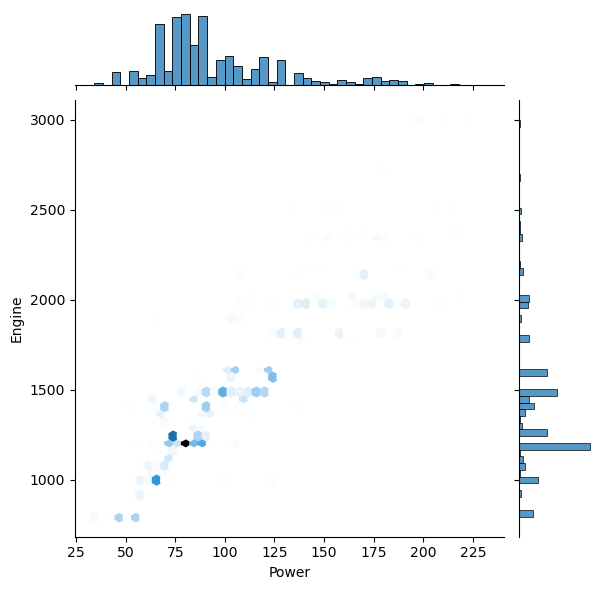

In [63]:
p = sns.jointplot(x='Power',y='Engine',data=df_non_outlier,kind='hex')
p.fig.set_dpi(100)

`Power` tập trung trong khoảng từ 50 - 125bhp và `Engine` tập trung trong khoảng 1000-1700cc.

#### d. Nhiên liệu:

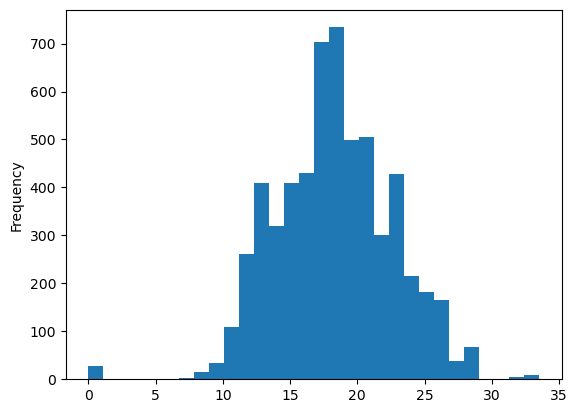

In [85]:
df['Mileage'].plot.hist(bins = 30);

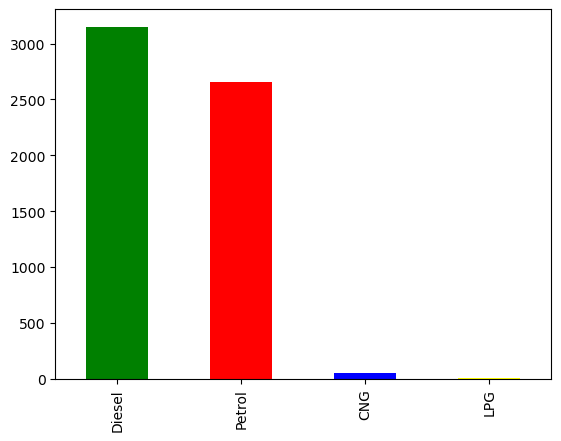

In [65]:
fuel_type = df['Fuel_Type'].value_counts()
fuel_type.plot.bar(color = ['green', 'red', 'blue', 'yellow']);

Xe có động cơ **Diesel** và động cơ **Petrol** có số lượng xấp xỉ nhau và hoàn toàn vượt trội so với 2 loại còn lại

#### e. Kiểu xe:

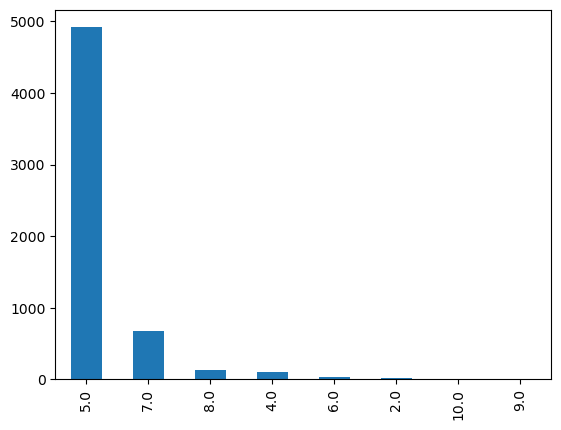

In [81]:
df['Seats'].value_counts().plot.bar();

Xe 5 chỗ là xe được mua nhiều nhất

#### f. Hãng xe:

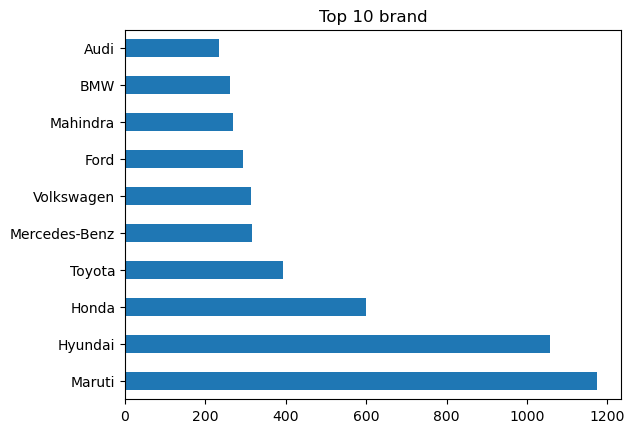

In [67]:
brand = df['Brand'].value_counts().head(10)
brand.plot.barh(title = "Top 10 brand");

**Maruti** và **Hyundai** là 2 brand có doanh số lớn nhất( Đều trên 1000 xe). Tiếp theo là Honda với gần 600 và Toyota với gần 400 xe.

#### Qua tập dữ liệu ta có thể rút ra:

**Nên chọn những xe có các tiêu chí sau:**

- Các xe có tình trạng mới, chưa được sử dụng nhiều.

- Về nhiên liệu thì Diesel và Petrol là 2 loại nhiên liệu phổ biến gần như nhau. Vì vậy nhiên liệu sẽ không ảnh hưởng nhiều.

- Mức giá nhỏ hơn 7,5.

- Xe 5 chỗ

- Xe có sức mạnh trong khoảng từ 50 - 125bhp và dung tích trong khoảng 1000-1700cc.

- Xe của Maruti và Hyundai

**Tuy nhiên vẫn có một số điểm chưa được kiểm chứng:**

- **Tại sao người dùng không chọn những dòng xe mạnh hơn cũng như xe có hộp số `Automatic` thuận tiện hơn?**

Để trả lời ta sẽ xem xem có yếu tố nào ảnh hưởng tới `Power` hoặc `Engine` hay không?

In [73]:
nume_df_corr = df.corr()
nume_df_corr.drop('Power', axis = 1).loc['Power']

Kilometers_Driven    0.033490
Mileage             -0.538844
Engine               0.866301
Seats                0.101460
Price                0.772843
Age                 -0.014531
Name: Power, dtype: float64

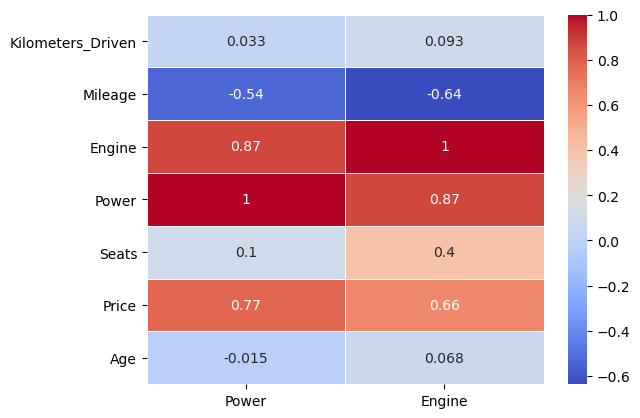

In [83]:
fig, ax = plt.subplots()
sns.heatmap(data = nume_df_corr[['Power', 'Engine']],  annot = True,
          cmap = "coolwarm", linewidths=0.5);

Mức độ tương quan giữa `Price` so với `Power` và `Engine` tương đối cao. Vì vậy để hạ giá thành của xe xuống người mua chấp nhận mua những chiếc xe yếu hơn

Vậy còn hộp số `Transmission` :

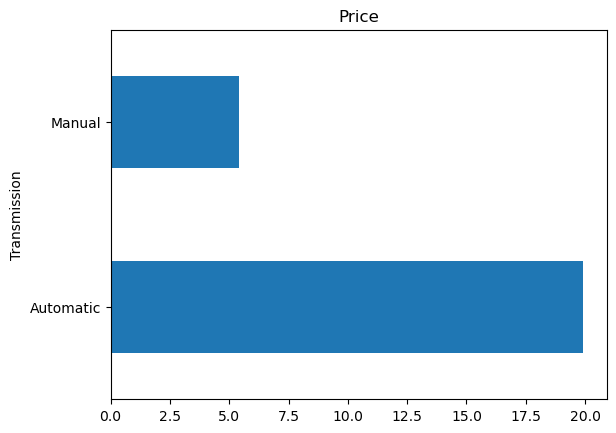

In [88]:
two_trans = df.groupby('Transmission')['Price'].sum() / df.groupby('Transmission')['Price'].count()
two_trans.plot.barh(title = 'Price');

Tương tự như sức mạnh của xe, người dùng chọn xe có hộp số  **Manual** vì nó có giá thành rẻ hơn.

- **Yếu tố nào giúp Maruti và Hyundai có doanh số bán ra lớn?**

Liệu có phải do giá thành thấp hơn các hãng khác nên 2 brand này có số lượng bán ra cao hay không?

In [214]:
Brands = pd.DataFrame()
Brands['counts'] = df.groupby('Brand')['Name'].count()
Brands['mean_price'] = df.groupby('Brand')['Price'].mean()
Brands['power'] = df.groupby('Brand')['Power'].mean()
Brands['engine'] = df.groupby('Brand')['Engine'].mean()
Brands.sort_values(by = 'counts',  ascending = False)

,counts,mean_price,power,engine
Brand,,,,
Maruti,1175,4.554868,74.245617,1147.657021
Hyundai,1058,5.513715,92.229726,1315.663516
Honda,600,5.424167,108.555367,1501.051667
Toyota,394,11.907970,129.062995,2344.251269
Mercedes-Benz,316,26.917848,193.579873,2373.674051
Volkswagen,314,5.306815,94.671592,1440.487261
Ford,294,6.957721,96.747959,1591.622449
Mahindra,268,8.058955,121.585075,2131.328358
BMW,262,25.439618,209.819847,2323.221374


In [208]:
Brands.corr()[['counts']]

,counts
counts,1.000000
mean_price,-0.282068
power,-0.289759
engine,-0.345247


Ta có thể thấy mức độ tương quan của các thuộc tính so với số lượng bán ra của xe < 0. Cho thấy số lượng bán ra của xe không hoàn toàn phụ thuộc vào thông số và giá thành.

In [216]:
sub_Brands = Brands.loc[Brands['mean_price'].apply(lambda x: x > 4 and x < 7.5)]

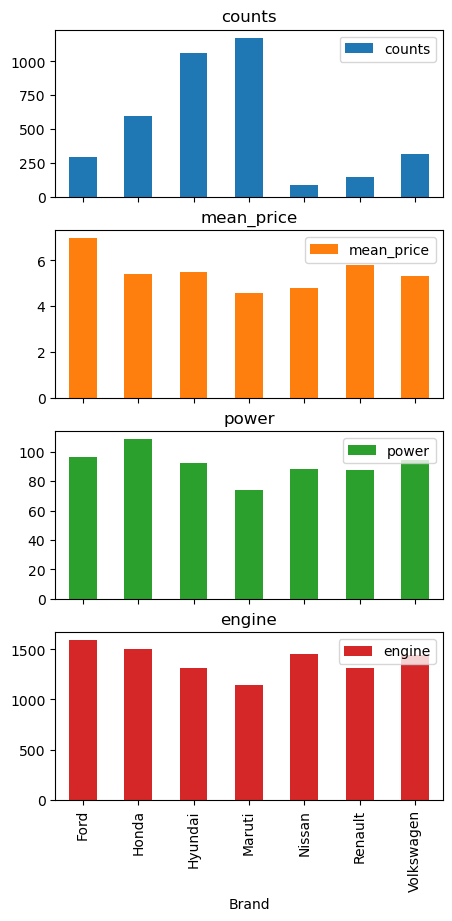

In [219]:
sub_Brands.plot.bar(subplots = True, figsize = (5, 10));

Thậm chí thông số của 2 Brand này còn thấp hơn so với các Brand cùng tầm giá. Vậy 2 Brand này được người dùng tin tưởng.


#### Result
Như vậy bây giờ chúng ta chỉ cần quan tâm tới:

- Mức giá.

- Tình trạng xe.

- Kiểu xe ( xe 5 chỗ )

- Thương hiệu

<h1 style = "font-family: Comic Sans MS"> Reflection </h1> 

### What difficulties have you encountered?

- Đặt câu hỏi - Khi đặt câu hỏi có 2 vấn đề em gặp phải:
     - Tìm ra câu hỏi có ý nghĩa. 
     - Từ dữ liệu đang có có thể trả lời được câu hỏi đặt ra hay không? 

- Hiểu ý nghĩa của các cột để sử dụng.

- Đôi khi gặp một số dữ liệu không tốt ( outlier, dữ liệu null, dữ liệu đặc biệt )


### What have you learned?

- Thành thạo hơn về Python, các thư viện như Pandas, Numpy, Seaborn, Mathplotlib.

- Sử dụng Kaggle.

- Sử dụng github.

- Quá trình EDA.

- Cách đặt câu hỏi và từ dữ liệu trả lời câu hỏi đó.

<h1 style = "font-family: Comic Sans MS"> References </h1> 

https://www.kaggle.com/datasets/colearninglounge/used-cars-price-prediction

https://www.youtube.com/watch?v=WeQvO_CIFPA